### Importing Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

### Exploring the dataset

In [79]:
df = pd.read_excel(r"C:\Users\muthu\Downloads\tech_layoffs.xlsx")
df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [80]:
df.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng'],
      dtype='object')

In [81]:
df.drop('#',axis=1,inplace=True)
df.head()

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [82]:
df['Country'].unique()

array(['India', 'Israel', 'USA', 'Sweden', 'United Kingdom', 'Canada',
       'France', 'Netherlands', 'Germany', 'Estonia', 'Kenya', 'Brazil',
       'New Zealand', 'Ireland', 'Australia', 'Singapore', 'Chile',
       'Spain', 'South Korea', 'Indonesia', 'Japan', 'China', 'Argentina',
       'Nigeria', 'United Arabian Emirates', 'Denmark', 'Norway',
       'Thailand', 'Senegal', 'Hong Kong', 'Austria', 'Finland',
       'Malaysia', 'Mexico', 'Russia', 'Switzerland', 'Portugal'],
      dtype=object)

In [83]:
df.dtypes

Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

### EDA by Country

In [65]:
topCountries=df.groupby('Country')['Laid_Off'].sum().nlargest(5)
topCountries_df=topCountries.reset_index()
fig = px.bar(topCountries_df, x='Country', y='Laid_Off', title='Top 5 Countries with Highest Layoffs')
fig.show()

In [66]:
grouped_data = df.groupby('Country').apply(lambda x : x.reset_index(drop=True))
grouped_data.head(10)

Company   Location_HQ    Country      Continent  Laid_Off  \
Country                                                                      
Argentina 0         Ualá  Buenos Aires  Argentina  South America        53   
          1        Lemon  Buenos Aires  Argentina  South America       100   
          2      Buenbit  Buenos Aires  Argentina  South America        80   
Australia 0          Zip        Sydney  Australia      Australia       300   
          1     Linktree     Melbourne  Australia      Australia        60   
          2    Redbubble     Melbourne  Australia      Australia        70   
          3        Zoomo        Sydney  Australia      Australia        27   
          4     Megaport      Brisbane  Australia      Australia        50   
          5    Airtasker        Sydney  Australia      Australia        45   
          6  Culture Amp     Melbourne  Australia      Australia        90   

            Date_layoffs  Percentage  Company_Size_before_Layoffs  \
Country                                                             
Argentina 0   2022-11-30         3.0                         1767   
          1   2022-11-24        38.0                          263   
          2   2022-05-23        45.0                          178   
Australia 0   2023-07-02        20.0                         1500   
          1   2023-06-06        27.0                          222   
          2   2023-05-10        23.0                          304   
          3   2023-05-02         8.0                          338   
          4   2023-04-27        16.0                          313   
          5   2023-04-27        20.0                          225   
          6   2023-04-18         9.0                         1000   

             Company_Size_after_layoffs        Industry     Stage  \
Country                                                             
Argentina 0                        1714         Finance  Series D   
          1                         163          Crypto  Series A   
          2                          98          Crypto  Series A   
Australia 0                        1200         Finance  Post-IPO   
          1                         162        Consumer   Unknown   
          2                         234          Retail  Post-IPO   
          3                         311  Transportation  Series B   
          4                         263  Infrastructure  Post-IPO   
          5                         180          Retail  Series C   
          6                         910              HR  Series F   

            Money_Raised_in_$_mil  Year       lat        lng  
Country                                                       
Argentina 0                  $544  2022 -34.61315  -58.37723  
          1                   $17  2022 -34.61315  -58.37723  
          2                   $11  2022 -34.61315  -58.37723  
Australia 0                  $896  2023 -33.86785  151.20732  
          1                  $165  2023 -37.81400  144.96332  
          2                   $55  2023 -37.81400  144.96332  
          3                  $105  2023 -33.86785  151.20732  
          4                   $98  2023 -27.46794  153.02809  
          5                   $26  2023 -33.86785  151.20732  
          6                  $257  2023 -37.81400  144.96332

In [67]:
usa_data=grouped_data.loc['USA']
india_data=grouped_data.loc['India']
germany_data=grouped_data.loc['Germany']
sweden_data = grouped_data.loc['Sweden']
uk_data = grouped_data.loc['United Kingdom']

In [70]:
def total_layOfss_overYears(df):
    return df.groupby('Year')['Laid_Off'].sum()

def average_layOfss_overYears(df):
    return df.groupby('Year')['Laid_Off'].mean()

def percentage_change_in_layOffs(df):
    return df.groupby('Year')['Laid_Off'].pct_change() * 100

def largest_layoffs_events(df, n=5, by='percentage'):
    if by == 'percentage':
        return df.nlargest(n, 'Percentage')
    elif by == 'absolute':
        return df.nlargest(n, 'Laid_Off')
    
def total_layOfss_byIndustry(df):
    return df.groupby('Industry')['Laid_Off'].sum().sort_values(ascending=False)

In [71]:
for country, country_data in [('USA', usa_data), ('India', india_data), ('Germany', germany_data), ('Sweden', sweden_data), ('United Kingdom', uk_data)]:
    print(f"Insights for {country}:")
    print("Total layoffs over the years:")
    print(total_layOfss_overYears(country_data))
    print("\nAverage layoffs per year:")
    print(average_layOfss_overYears(country_data))
    print("\nPercentage change in layoffs over the years:")
    print(percentage_change_in_layOffs(country_data))
    print("\nTop 5 largest layoffs events:")
    print(largest_layoffs_events(country_data))
    print("\nLayoffs by industry:")
    print(total_layOfss_byIndustry(country_data))
    print("\n\n")

Insights for USA:
Total layoffs over the years:
Year
2020     44217
2021      6137
2022     92755
2023    126822
2024      4050
Name: Laid_Off, dtype: int64

Average layoffs per year:
Year
2020    185.785714
2021    681.888889
2022    270.422741
2023    418.554455
2024    337.500000
Name: Laid_Off, dtype: float64

Percentage change in layoffs over the years:
0               NaN
1        157.142857
2        -85.555556
3         80.769231
4         -4.255319
           ...     
900      -41.269841
901      -72.972973
902    17900.000000
903      -97.222222
904      300.000000
Name: Laid_Off, Length: 905, dtype: float64

Top 5 largest layoffs events:
          Company    Location_HQ Country      Continent  Laid_Off  \
6          Zulily        Seattle     USA  North America       839   
20         Convoy        Seattle     USA  North America       500   
93        Bitwise         Fresno     USA  North America       900   
396  Fifth Season     Pittsburgh     USA  North America       100   

## Layoff Insights report:
### 1. USA:
   #### Total layoffs over the years:
   - The quantity of layoffs in the United States has exhibited substantial fluctuations across the years, reaching its peak in 2023 with 126,822 layoffs. This indicates a possible lack of stability in the job market during that specific timeframe
   #### Average layoffs per year:
   - The average annual layoffs display a diverse trend, signaling fluctuations in employment stability over time
   #### Percentage Change in Layoffs Over the Years:
   - The percentage change in layoffs has shown considerable fluctuations from year to year, suggesting periods of significant shifts in the job market.
   #### Top 5 Largest Layoffs Events:
   1. Zulily - 839 layoffs
   2. Convoy - 500 layoffs
   3. Bitwise - 900 layoffs
   4. Fifth Season - 100 layoffs
   5. Playdots - 65 layoffs
   #### Layoffs by Industry:
   - The most affected industries include Consumer, Retail, Finance, Transportation, and Real Estate. Understanding layoffs by industry can help identify sectors facing the most challenges.
### 2. India:
   #### Total layoffs over the years:
   - India has a noticable increase from 2020 to 2020 and a decrace in 2023. The low layoff in 2021 suggests relative stability compared to other years.
   #### Average layoffs per year:
   - The average annual layoffs exhibit fluctuations, signifying varying levels of employment stability over time.
   #### Percentage Change in Layoffs Over the Years:
   - The percentage changes in layoffs highlight periods of both growth and decline in job market stability, with particularly sharp shifts in certain year.
   #### Top 5 Largest Layoffs Events:
   1. ZestMoney - 150 layoffs
   2. FrontRow - 4 layoffs
   3. Crejo.Fun - 170 layoffs
   4. Udayy - 100 layoffs
   5. FrontRow - 39 layoffs
   #### Layoffs by Industry:
   - The most affected industries include Education, Food, Finance, Transportation, and Marketing. Understanding layoffs by industry can help identify sectors facing the most challenges.
### 3. Germany:
   #### Total layoffs over the years:
   - Germany observed a noteable surge in layoffs in 2023, reaching 12,118, suggesting potential economic challenges or significant restructuring within industries.
   #### Average layoffs per year:
   - The average annual layoffs display fluctuations, with a notable increase observed in 2023. This could potentially indicate a period of economic uncertainty.
   #### Percentage Change in Layoffs Over the Years:
   - Percentage changes in layoffs exhibit substantial fluctuations, suggesting volatile shifts in the job market over time.
   #### Top 5 Largest Layoffs Events:
   1. Dropp - 60 layoffs
   2. Planetly - 200 layoffs
   3. Zeitgold - 75 layoffs
   4. Pitch - 80 layoffs
   5. Infarm - 500 layoffs
   #### Layoffs by Industry:
   - Industries such as Finance, Food, Healthcare, Media, and Transportation are among the most affected, indicating potential areas of concern for employment stability.
### 4. Sweden:
   #### Total layoffs over the years:
   - Sweden witnessed a notable rise in layoffs from 2022 to 2023, indicating possible economic challenges or issues specific to certain industries.
   #### Average layoffs per year:
   - The average number of layoffs per year exhibited a significant increase in 2023, signaling a period of economic instability.
   #### Percentage Change in Layoffs Over the Years:
   - The percentage changes in layoffs show notable fluctuations, indicating varying levels of job market stability over time.
   #### Top 5 Largest Layoffs Events:
   1. Juni - 72 layoffs
   2. Oda - 70 layoffs
   3. Spotify - 1500 layoffs
   4. Acast - 70 layoffs
   5. Voi - 130 layoffs
   #### Layoffs by Industry:
   - Finance, Food, Healthcare, Media, and Transportation are among the most affected industries, highlighting areas that may require targeted interventions or support.
### 5. United Kingdom:
   #### Total layoffs over the years:
   - The United Kingdom experienced fluctuations in layoffs over the years, with notable peaks in 2020 and 2023. These peaks suggest potential economic challenges or issues specific to certain industries.
   #### Average layoffs per year:
   - Average layoffs per year show variations, with a notable increase observed in 2023, suggesting potential economic instability.
   #### Percentage Change in Layoffs Over the Years:
   - Percentage changes in layoffs exhibit significant fluctuations, indicating varying levels of job market stability over time..
   #### Top 5 Largest Layoffs Events:
   1. Glisser - 25 layoffs
   2. Britishvolt - 206 layoffs
   3. OneWeb - 451 layoffs
   4. Docly - 8 layoffs
   5. Arrival - 800 layoffs
   #### Layoffs by Industry:
   - Aerospace, Crypto, Finance, Food, Healthcare, Marketing, Media, and Transportation are among the most affected industries, indicating areas requiring attention and support.

## EDA by Year

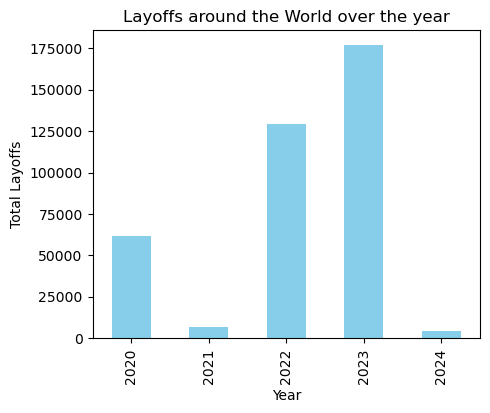

In [148]:
yearly_layoff = df.groupby('Year')['Laid_Off'].sum()
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(5, 4))
yearly_layoff.plot(kind='bar',color = 'skyblue')
plt.ylabel('Total Layoffs')
plt.title('Layoffs around the World over the year')
plt.show()

In [158]:
def plot_layoffs_by_industry(dataset, year):
    layoffs_year = dataset[dataset['Year'] == year]
    layoffs_by_industry = layoffs_year.groupby('Industry')['Laid_Off'].sum()
    plt.figure(figsize=(12, 6))
    layoffs_by_industry.sort_values(ascending=False).plot(kind='bar', color='darkcyan')
    plt.title(f'Layoffs by Industry in {year}')
    plt.xlabel('Industry')
    plt.ylabel('Total Layoffs')
     plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

IndentationError: unexpected indent (95282414.py, line 9)

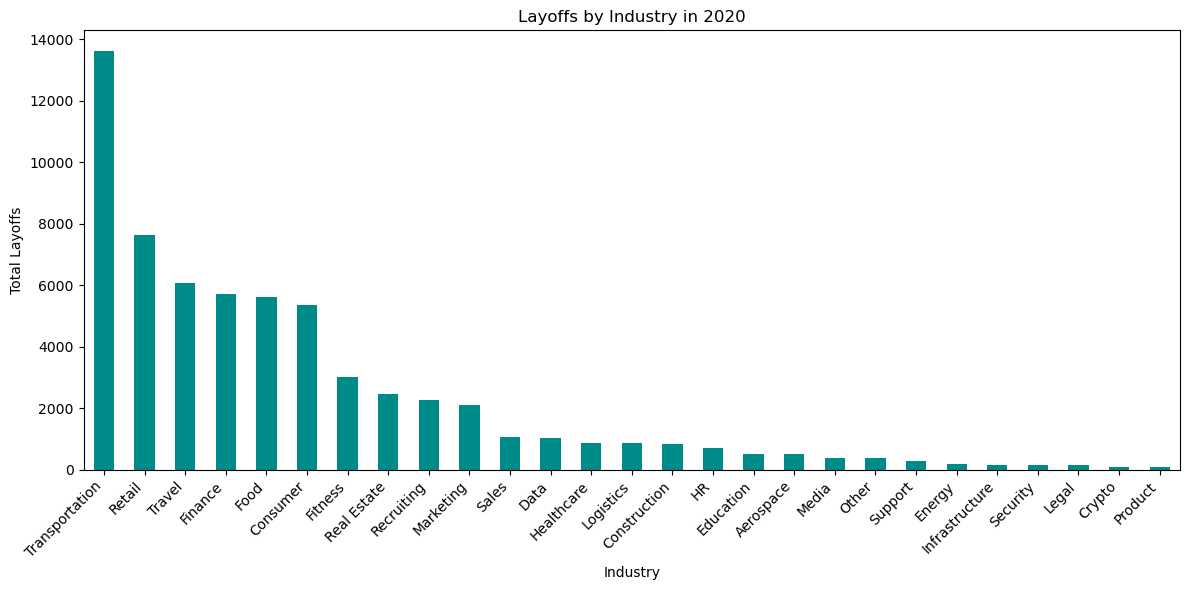

In [159]:
plot_layoffs_by_industry(df,2020)

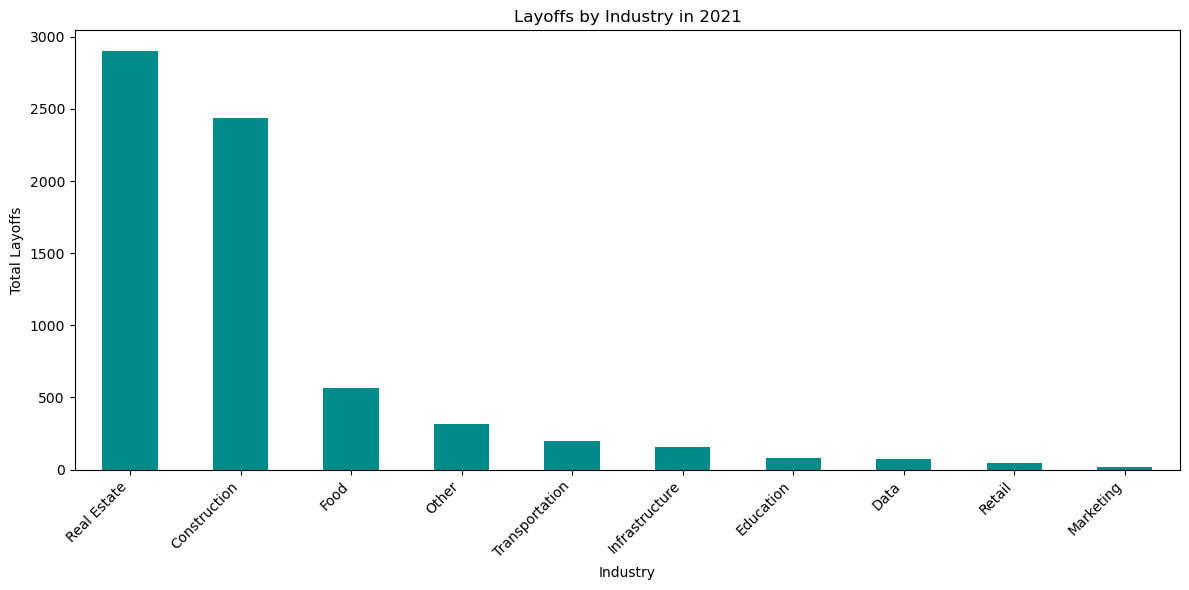

In [160]:
plot_layoffs_by_industry(df,2021)

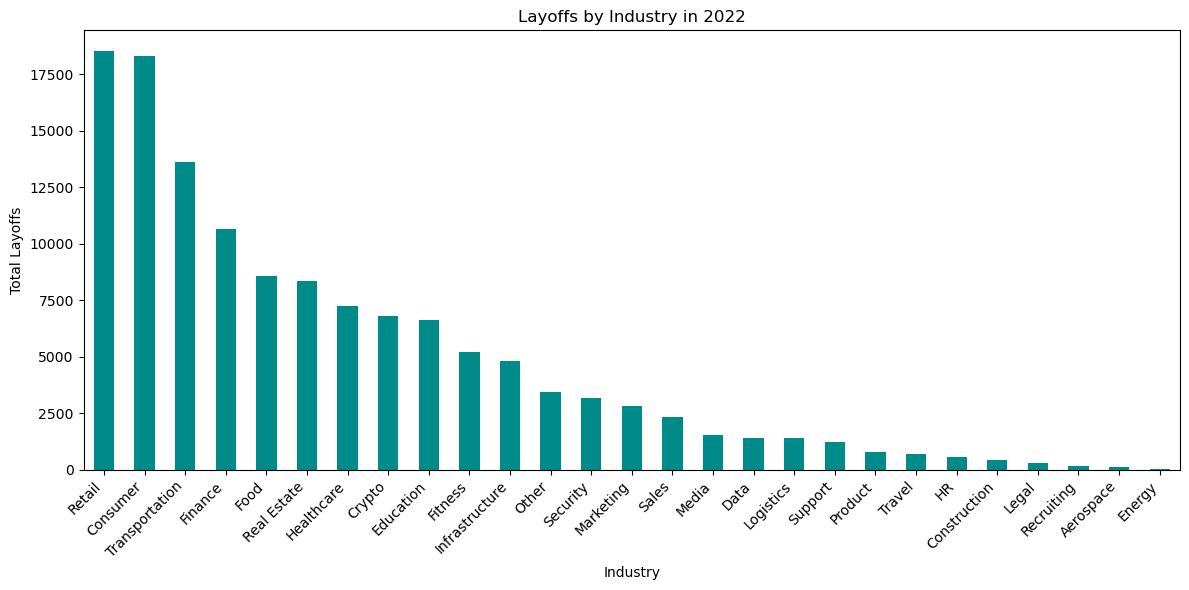

In [161]:
plot_layoffs_by_industry(df,2022)

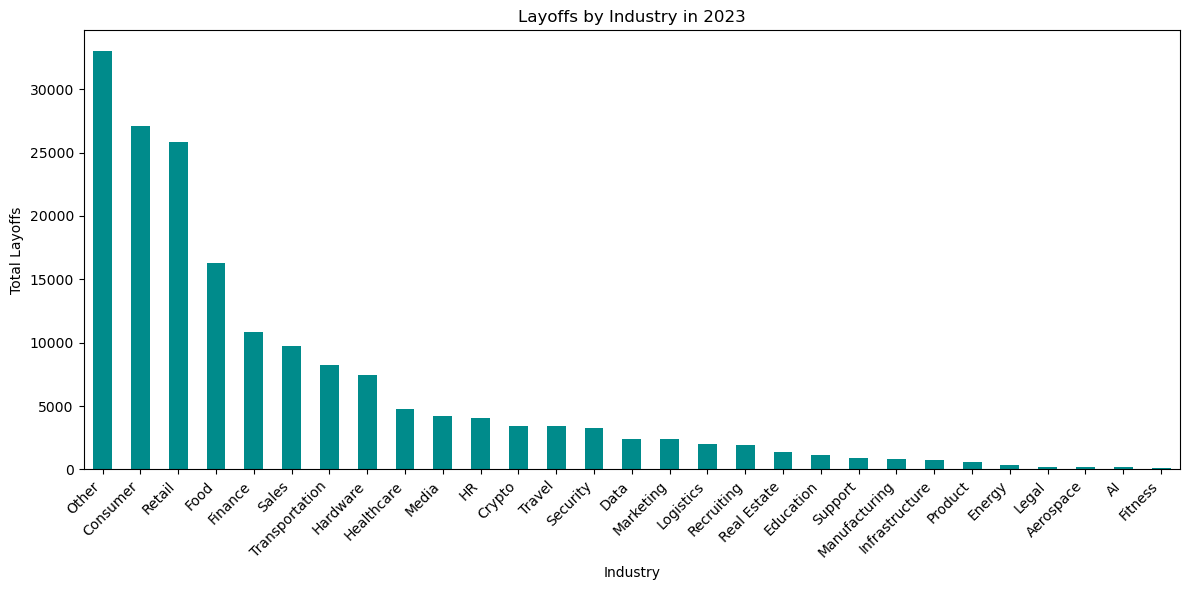

In [162]:
plot_layoffs_by_industry(df,2023)

## EDA by Company

In [168]:
df['Size_Change_Percentage'] = ((df['Company_Size_after_layoffs']-df['Company_Size_before_Layoffs'])
                              /df['Company_Size_after_layoffs']) * 100
df

,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Size_Change_Percentage
0,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,-17.652251
1,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,-25.000000
2,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,-11.111111
3,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,-11.111111
4,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,-31.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053,-205.128205
1414,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864,-20.467836
1415,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207,-9.881423
1416,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057,-17.647059


In [170]:
company_counts = df['Company'].value_counts()
print("Top 5 company with most layoffs")
print(company_counts.head(5))

Top 5 company with most layoffs
Company
Uber      5
Blend     5
Gopuff    5
Swiggy    5
Unity     5
Name: count, dtype: int64


In [177]:
company_data = df.groupby('Company').apply(lambda x:x.reset_index(drop=True))

In [172]:
uber_data = company_data.loc['Uber']
blend_data = company_data.loc['Blend']
gopuff_data = company_data.loc['Gopuff']
swiggy_data = company_data.loc['Swiggy']
unity_data = company_data.loc['Unity']

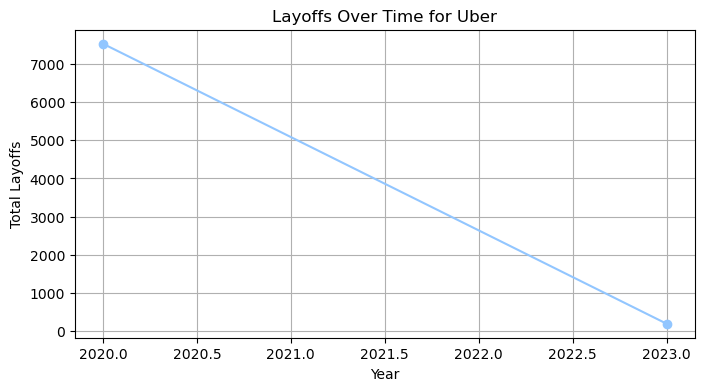

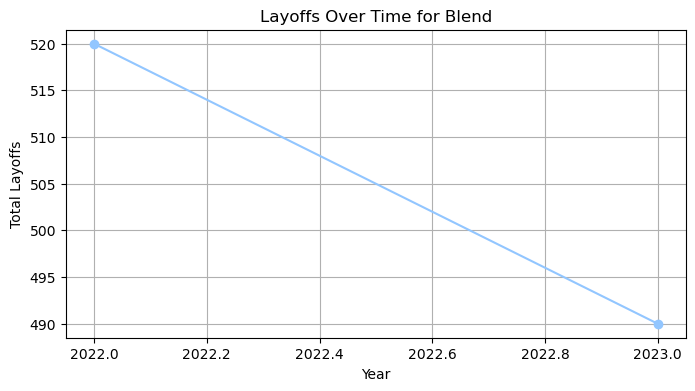

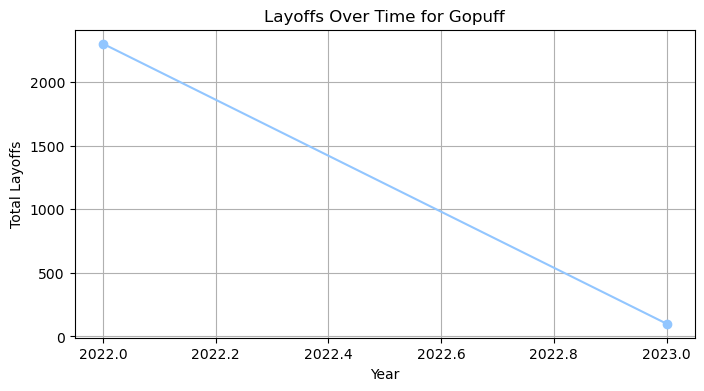

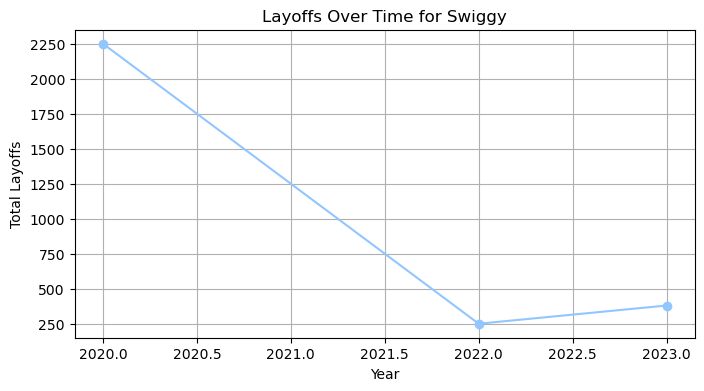

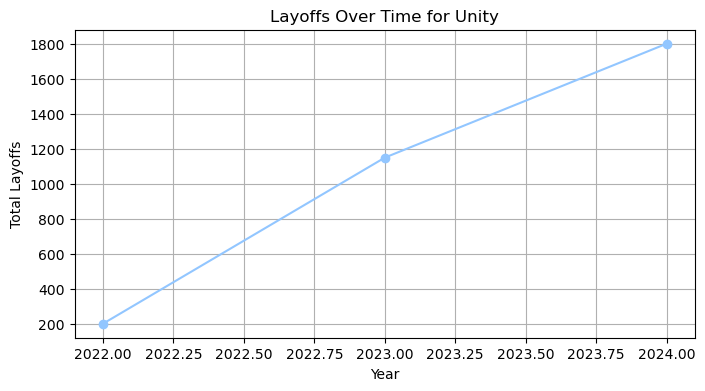

In [188]:
def plot_layoffs_over_time(company_data, company_name):
    plt.figure(figsize=(8, 4))
    company_data.groupby('Year')['Laid_Off'].sum().plot(marker='o')
    plt.title(f'Layoffs Over Time for {company_name}')
    plt.xlabel('Year')
    plt.ylabel('Total Layoffs')
    plt.grid(True)
    plt.show()

plot_layoffs_over_time(uber_data, 'Uber')
plot_layoffs_over_time(blend_data, 'Blend')
plot_layoffs_over_time(gopuff_data, 'Gopuff')
plot_layoffs_over_time(swiggy_data, 'Swiggy')
plot_layoffs_over_time(unity_data, 'Unity')